# Метод сезонной декомпозиции 

Источник: [Лекция 4. Сезонная декомпозиция. Алгоритм. Пример. ][1]

[1]: https://www.youtube.com/watch?v=zoZz1HgX340

# Заметки к лекции

Этот метод одновременно:
- устарел,
- активно используется.

Одно другому не мешает.


## Тренд при сезонной декомпозиции

Тренд - скользящее среднее.

**Скользящее среднее.**
Пусть $k$ (нечетное) натуральное число, есть ширина "окна".
Мы создаем новый ряд на основании исходного 
$$X_t -> Y_t = mean([X_{t-k/2}, ..., X_{t-1}, X_{t}, X_{t+1}, ..., X_{t+k/2}])$$

**Замечание.** При нечетном $k$, мы $k/2$ делим на цело, то есть:
- если $ k=3 $, то $k/2 = 1$
- $ k=7 $, то $k/2 = 3$

Тройка $X_{t-1}, X_{t}, X_{t+1}$ (при $k=3$) называется окном. Окно скользит(движется/меняется) но в каждый конкретный момент t - оно совершенно определено. 

Скользящее среднее используется как сглаживатель, так как ряд полученный после его применения, обычно менее зашумлен.

Скользящее среднее может являться фильтром (взвешенная средняя элементов последовательности) = позволяет строить сглаженный ряд без сезонностей.
Если разумно подобрать веса и ширину окна у скользящего среднего, то в результате получим ряд у которого отфильтрована сезонность. 

Например, если k = длине периода сезонных отклонений.
Для месячных данных k = 12
$$ \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} X_{t} = \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} T_{t} + \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} S_{t} + \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} E_{t} $$


$ \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} T_{t} $ - сумма трендовых значений (сглаженная),

$ \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} S_{t} $ - сумма сезонных поправок,

$ \frac{1}{k} \sum_{t = t_{0} + 1}^{t_{0} + k} E_{t} $ - сумма ошибок,


Для любого $ t_{0} $ второе слагаемое будет одинаковым, так как берется сумма сезонных поправок за весь период сезонных отклонений (так мы выбрали k = 12 для месячных данных)


In [1]:
import pandas as pd
import numpy as np

## пример работы со скользящим окном

In [14]:
ts = [55, 60, 68, 63, 65, 61, 54, 52, 46, 42, 37, 30, 37]
print('ts = ', ts)

window_k = 3

ts =  [55, 60, 68, 63, 65, 61, 54, 52, 46, 42, 37, 30, 37]


In [15]:
df = pd.DataFrame(ts, columns=['ts'])

In [16]:
df.head()

,ts
0,55
1,60
2,68
3,63
4,65


In [17]:
df['sliding_window'] = df['ts'].rolling(window=window_k, center=True).mean()
df.head()

,ts,sliding_window
0,55,NaN
1,60,61.000000
2,68,63.666667
3,63,65.333333
4,65,63.000000


In [18]:
np.mean([55, 60, 68]) 

61.0

In [19]:
np.mean([60, 68, 63]) 

63.666666666666664

In [20]:
df.tail()

,ts,sliding_window
8,46,46.666667
9,42,41.666667
10,37,36.333333
11,30,34.666667
12,37,NaN


In [21]:
np.mean([42, 37, 30])

36.333333333333336

In [22]:
np.mean([37, 30, 37]) 

34.666666666666664

### Что делать если $k$ - четное?

Возникает сложность интерпритации, а именно как соотносить исходный ряд и сглаживающий ряд.

В случае четных значений $k$ переходят к взвешенным скользящим средним. 

**Замечание.** Для четных значений $k$, $k/2$ - получатся целым числом, то есть:
- если $ k=4 $, то $k/2 = 2$
- $ k=12 $, то $k/2 = 6$

В случае четного $k$, при переходе к сглаженному ряду 
$$X_t -> Y_t $$
берут нечетное число членов исходного рядя ($X_t$), но первое и последнее слагаемое берется с весом $0.5$.

$$ Y_t = \frac{1}{2} X_{t-k/2},  X_{t-k/2 + 1 }, ..., X_{t-1}, X_{t}, X_{t+1}, ..., X_{t - k/2 - 1 }, \frac{1}{2} X_{t+k/2} $$



## Тренд при сезонной декомпозиции

взвешенное скользящее среднее, которое отфильтровывает сезонность

**Замечание**. При симметричном вычислении скользящего среднего последние значения в ряде, как и в начале будут `NaN`. *Если конечные значения для ряда тренда важны*, то предлагают использовать опережающее скользящее среднее.

При опережающем скользящем среднем - мы сдвигаем вычисленные значения тренда вправо (в будущее), так чтобы последние `NaN` были заполнены.

То есть $X_t -> Y_t $
будет соответствовать новый ряд $Y_t$:
$$ Y_t = X_{t-k},  X_{t-k + 1}, ..., X_{t-1}, X_{t}$$


## Сезонные поправки не меняются со временим (при сезонной декомпозиции) 

Это недостаток метода.

Если такое ограничение Вас не устраивает, то надо использовать другие модели:
- ARIMA,
- Экспоненциальное сглаживание.

Это адаптивные методы, в которых сезонные поправки меняются от периода к периоду.

## Вычислили тренд, что дальше?

$$ X_{t} = T_{t} + S_{t} + E_{t} $$

$$ X_{t} - T_{t} = S_{t} + E_{t} $$

$ X_{t} - T_{t} $ нам известны. Возьмем те значения, которые соответствуют значению "январь" для разных лет. Тоже делаем для "февраля", для "марта", и т.д. до "декабря". Если период в днях недели, то от "понедельника" до "воскресенья".

Выбираем -> Усредняем -> Усреднение и будет сезонной поправкой. 

Получили сезонные поправки для января, февраля, ..., декабря делаем из них ряд. 
Склеиваем этот ряд "вдоль" все периода $X_{t}$ - получаем график "сезонность"


## Ошибки. С ними все совсем просто 

$$ X_{t} - T_{t} = S_{t} + E_{t} $$
 
Мы уже знаем сезонность и можем вычислить ошибки следующим образом:

$$ X_{t} - T_{t} - S_{t} = E_{t} $$

Теперь имеем все ряды, то есть имеем сезонную декомпозицию. 

## Недостатки метода сезонной декомпозиции

1. Сезонные поправки постоянные 
2. Тренд не поддается экстраполяции (как его продолжать для будущих дат)
3. Алгоритм создает тренд с пропусками (значения `NaN`), особенно обидны пропуски в конце ряда. 


Аббакумов - метод устарел.

Многие его используют. 
Загуглите "программа курса, прогнозирование, сезонная декомпозиция"

# Практика
## Сезонная декомпозиция

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
matplotlib.style.use('default')
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
df = pd.read_csv('data/series_g.csv', sep=';')
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


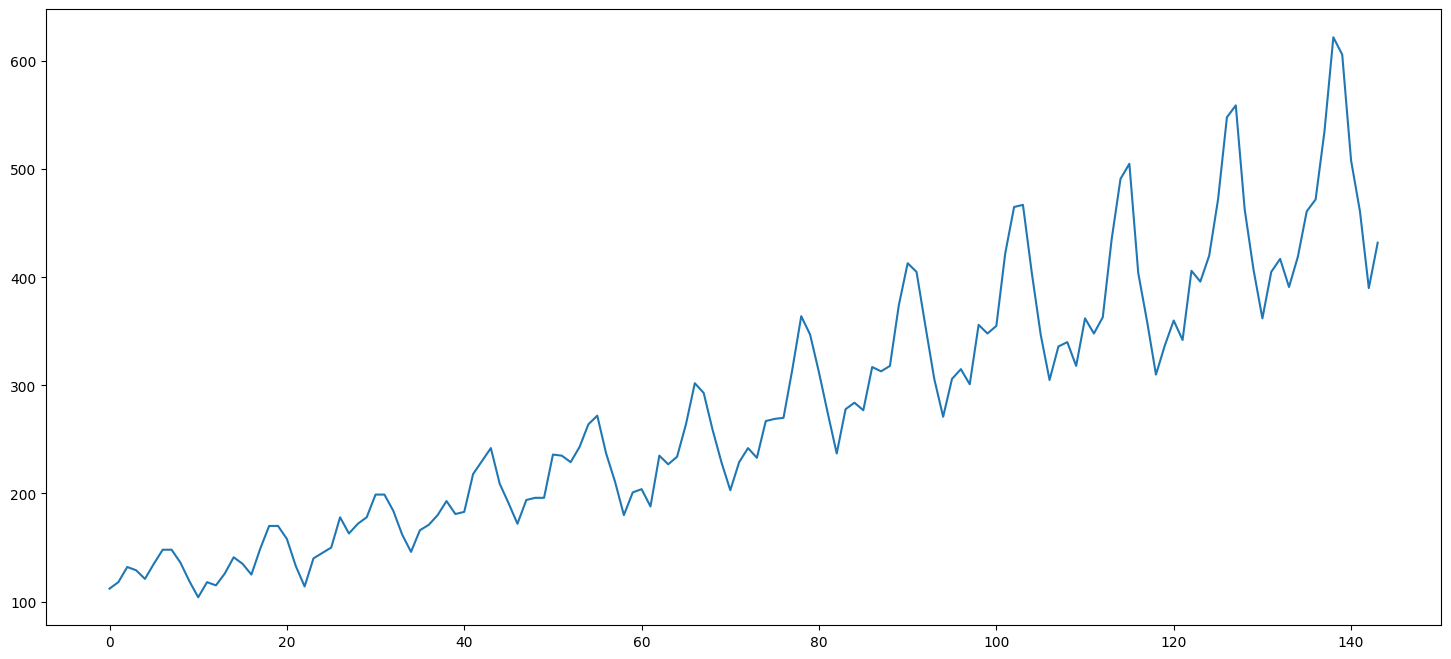

In [34]:
#gseries = df['series_g']
gseries = df[df.columns[1]]
type(gseries)
gseries.plot(figsize=(18,8));

ряд обладает характеристиками:
- мультипликативная сезонность,
- нет смены характера ряда,
- нет пропусков,
- нет выбросов.

In [35]:
# Версия команды для рядов с аддитивной сезонностью
# result = seasonal_decompose(gseries, model='additive', period=12)

# сезонность мультипликативная, поэтому пишем: model='multiplicative'
# period=12 - период сезонных отклонений равен 12 точкам (месяцам)
result = seasonal_decompose(gseries, model='multiplicative', period=12)

Результаты сезонной декомпозиции 

C:\Users\-\AppData\Local\Temp\ipykernel_10200\207256119.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1800x800 with 0 Axes>

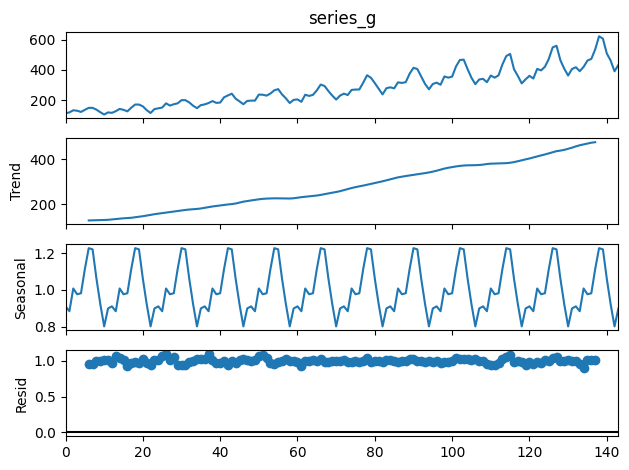

In [42]:
plt.figure(figsize=(18,8))
result.plot()

plt.tight_layout()


## Тренд
Обратите внимание: сезонная составляющая ряда отсутствует.
Она отфильтрована скользящим средним.

Text(0.5, 1.0, 'Тренд')

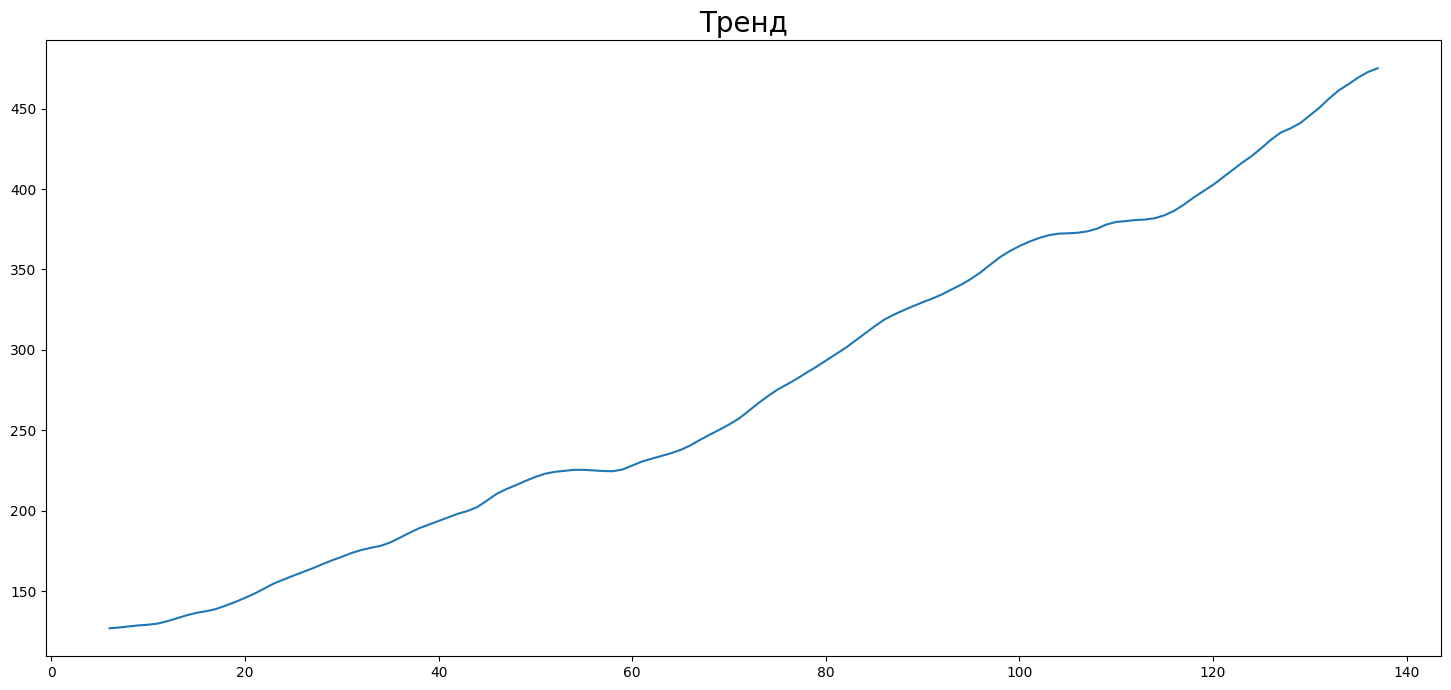

In [43]:
plt.figure(figsize=(18,8))
result.trend.plot()
plt.title('Тренд', fontsize=20)

Text(0.5, 1.0, 'Сезонность')

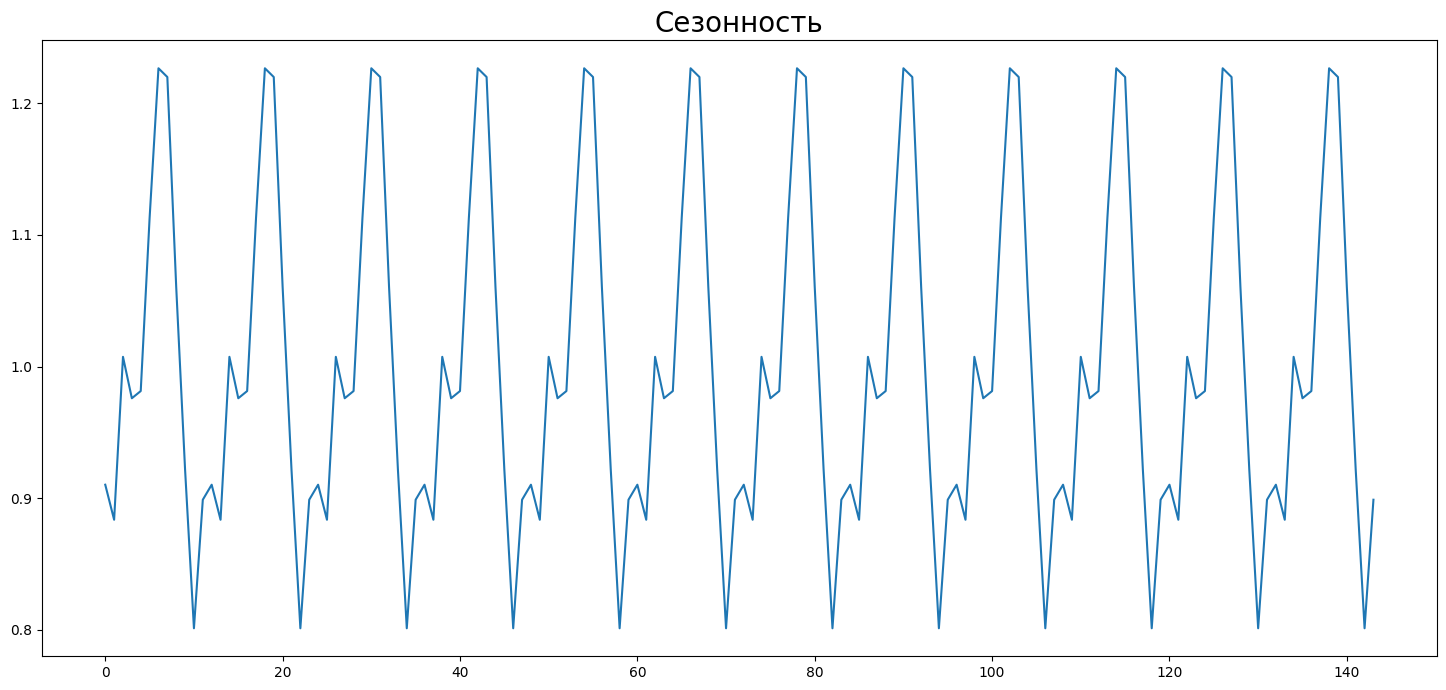

In [44]:
plt.figure(figsize=(18,8))
result.seasonal.plot()
plt.title('Сезонность', fontsize=20)

Text(0.5, 1.0, 'Остатки')

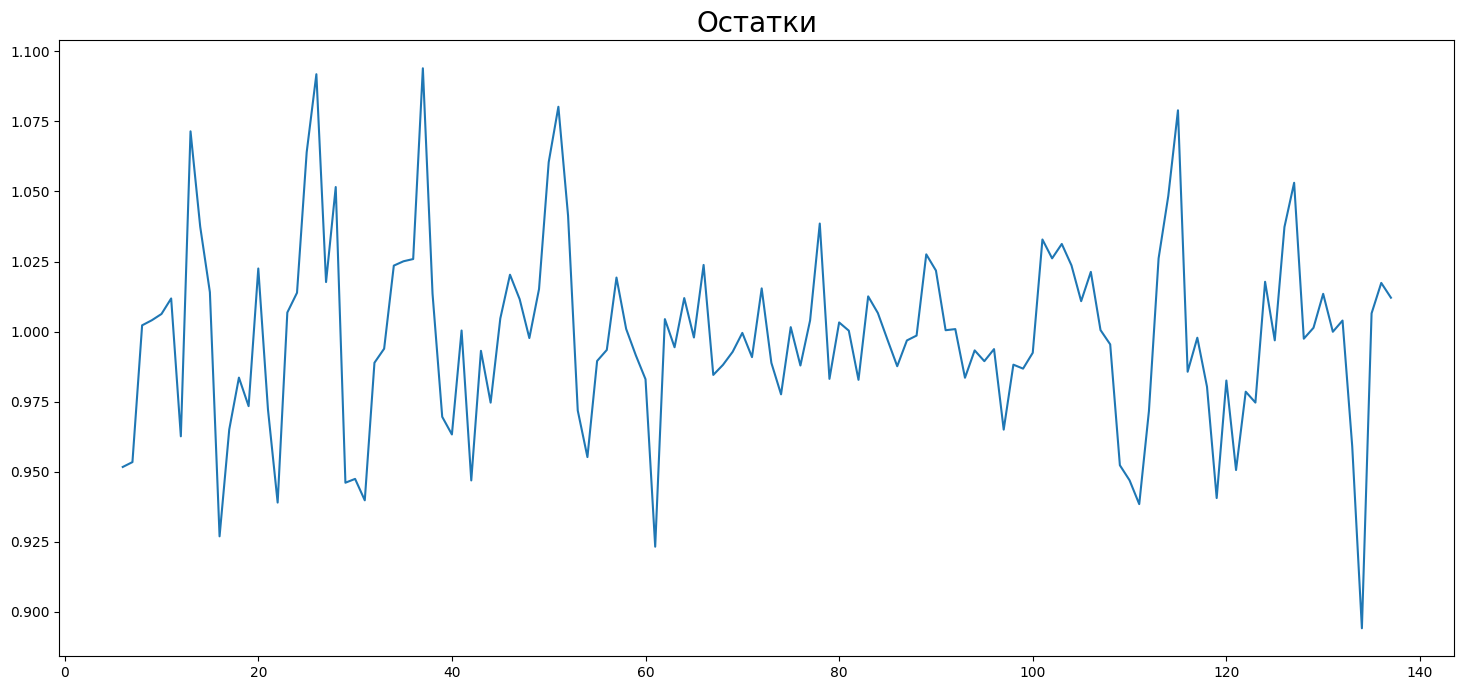

In [45]:
plt.figure(figsize=(18,8))
result.resid.plot()
plt.title('Остатки', fontsize=20)

### Ряд очищенный от сезонности

Тренд * ошибка

**Замечание**: на сезонность делим. В случае аддитивной модели сезонность вычитается.

In [46]:
# SA сокращение от seasonally adjusted time series
# то есть ряд с удаленной сезонностью

gseries_sa = gseries/result.seasonal

Text(0.5, 1.0, 'SA plot')

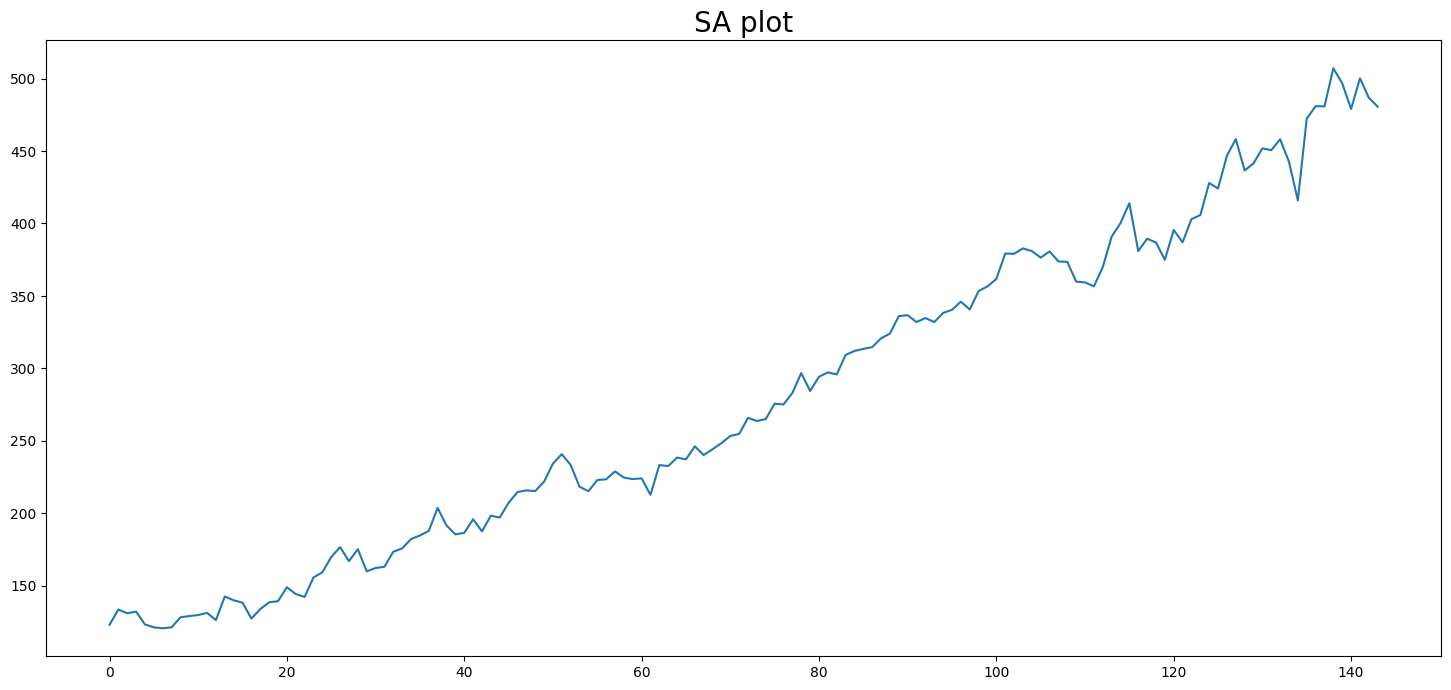

In [47]:
plt.figure(figsize=(18,8))
gseries_sa.plot()
plt.title('SA plot', fontsize=20)

Исследователи/аналитики (в банках, правительствах) используют этот метод, чтобы посмотреть именно на этот ряд SA (очищенный от сезонности ряд).

Сезонность мешает понять насколько хорошо или плохо идут дела. В некоторых случаях даже не понятно, а тренд растущий или убывающий?

### Исходный ряд и SA ряд

Text(0.5, 1.0, 'Исходный ряд и SA ряд')

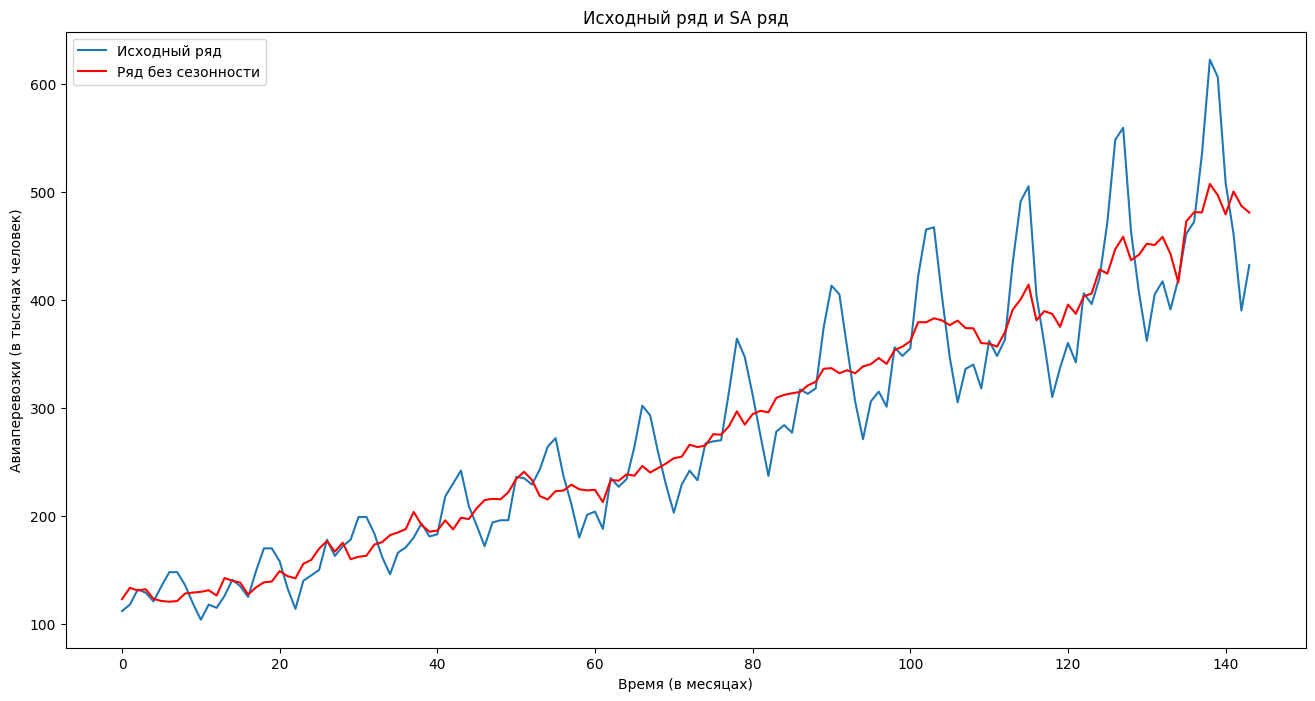

In [53]:
plt.figure(figsize=(16,8))
plt.plot(gseries, label='Исходный ряд')
plt.plot(gseries_sa, label='Ряд без сезонности', c='red')
plt.legend(loc='best')

plt.xlabel(u'Время (в месяцах)')
plt.ylabel(u'Авиаперевозки (в тысячах человек)')
plt.title(u'Исходный ряд и SA ряд')


Обычно на этом графике в методе сезонной декомпозиции заканчивают исследовательский анализ.

## Попробуем применить метод сезонной декомпозиции для прогноза. 

**Замечание:** Обычно так не делают! Используют другие методы прогнозирования.

In [54]:
print(result.trend)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
139   NaN
140   NaN
141   NaN
142   NaN
143   NaN
Name: trend, Length: 144, dtype: float64


Там везде пропуски? Почему они есть в начале и в конце?

In [56]:
result.trend.head(12)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     126.791667
7     127.250000
8     127.958333
9     128.583333
10    129.000000
11    129.750000
Name: trend, dtype: float64

In [57]:
result.trend.tail(12)

132    456.333333
133    461.375000
134    465.208333
135    469.333333
136    472.750000
137    475.041667
138           NaN
139           NaN
140           NaN
141           NaN
142           NaN
143           NaN
Name: trend, dtype: float64

Что делаем? Заменяем центрированное скользящее среднее, на опережающее скользящее среднее. 

In [58]:
trend_2 = result.trend.dropna()
trend_2

6      126.791667
7      127.250000
8      127.958333
9      128.583333
10     129.000000
          ...    
133    461.375000
134    465.208333
135    469.333333
136    472.750000
137    475.041667
Name: trend, Length: 132, dtype: float64

Прогнозируем тренд, используя регрессию.

Готовим предикторы

In [59]:
trend_3 = pd.DataFrame({'trend': trend_2, 'month_num':range(13, 145)})

In [61]:
trend_3

,trend,month_num
6,126.791667,13
7,127.250000,14
8,127.958333,15
9,128.583333,16
10,129.000000,17
...,...,...
133,461.375000,140
134,465.208333,141
135,469.333333,142
136,472.750000,143


Будем аппроксимировать тренд многочленом (линейной регрессией).
Добавим предикторы для квадратной и кубической регресии

In [62]:
trend_3['num^2'] = trend_3['month_num']**2
trend_3['num^3'] = trend_3['month_num']**3

In [63]:
trend_3.head()

,trend,month_num,num^2,num^3
6,126.791667,13,169,2197
7,127.250000,14,196,2744
8,127.958333,15,225,3375
9,128.583333,16,256,4096
10,129.000000,17,289,4913


In [64]:
trend_3.tail()

,trend,month_num,num^2,num^3
133,461.375000,140,19600,2744000
134,465.208333,141,19881,2803221
135,469.333333,142,20164,2863288
136,472.750000,143,20449,2924207
137,475.041667,144,20736,2985984


In [65]:
trend_3.columns

Index(['trend', 'month_num', 'num^2', 'num^3'], dtype='object')

Создадим отклик

In [66]:
y = trend_3['trend']

In [68]:
# предиктор для линейного тренда
X1 = trend_3.drop(columns=['trend', 'num^2', 'num^3'])

# предиктор для квадратичного тренда
X2 = trend_3.drop(columns=['trend', 'num^3'])

# предиктор для кубического тренда
X3 = trend_3.drop(columns=['trend'])


Прогнозируем тренд, используя полиномиальную регрессию.

Обучаем три модели, ищем лучшую.

**Замечание:** строим подгонку для тренда, а не для исходного ряда


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model1 = LinearRegression()
model1.fit(X1, y)

LinearRegression()

In [72]:
coef1 = pd.DataFrame(
    list(zip(['intercept']+X1.columns.tolist(), [model1.intercept_]+model1.coef_.tolist())),
    columns=['predictor','coef']    
    )
coef1

,predictor,coef
0,intercept,68.646647
1,month_num,2.666938


In [73]:
# квадратичная 
model2 = LinearRegression()
model2.fit(X2, y)
coef2 = pd.DataFrame(
    list(zip(['intercept']+X2.columns.tolist(), [model2.intercept_]+model2.coef_.tolist())),
    columns=['predictor','coef']    
    )
coef2

,predictor,coef
0,intercept,98.220871
1,month_num,1.681200
2,num^2,0.006279


In [74]:
# кубическая 
model3 = LinearRegression()
model3.fit(X3, y)
coef3 = pd.DataFrame(
    list(zip(['intercept']+X3.columns.tolist(), [model3.intercept_]+model3.coef_.tolist())),
    columns=['predictor','coef']    
    )
coef3

,predictor,coef
0,intercept,105.234520
1,month_num,1.281586
2,num^2,0.012207
3,num^3,-0.000025


In [76]:
y1 = model1.predict(X1)
y2 = model2.predict(X2)
y3 = model3.predict(X3)

In [77]:
print(y.size, y1.size, y2.size, y3.size)

132 132 132 132


<Axes: >

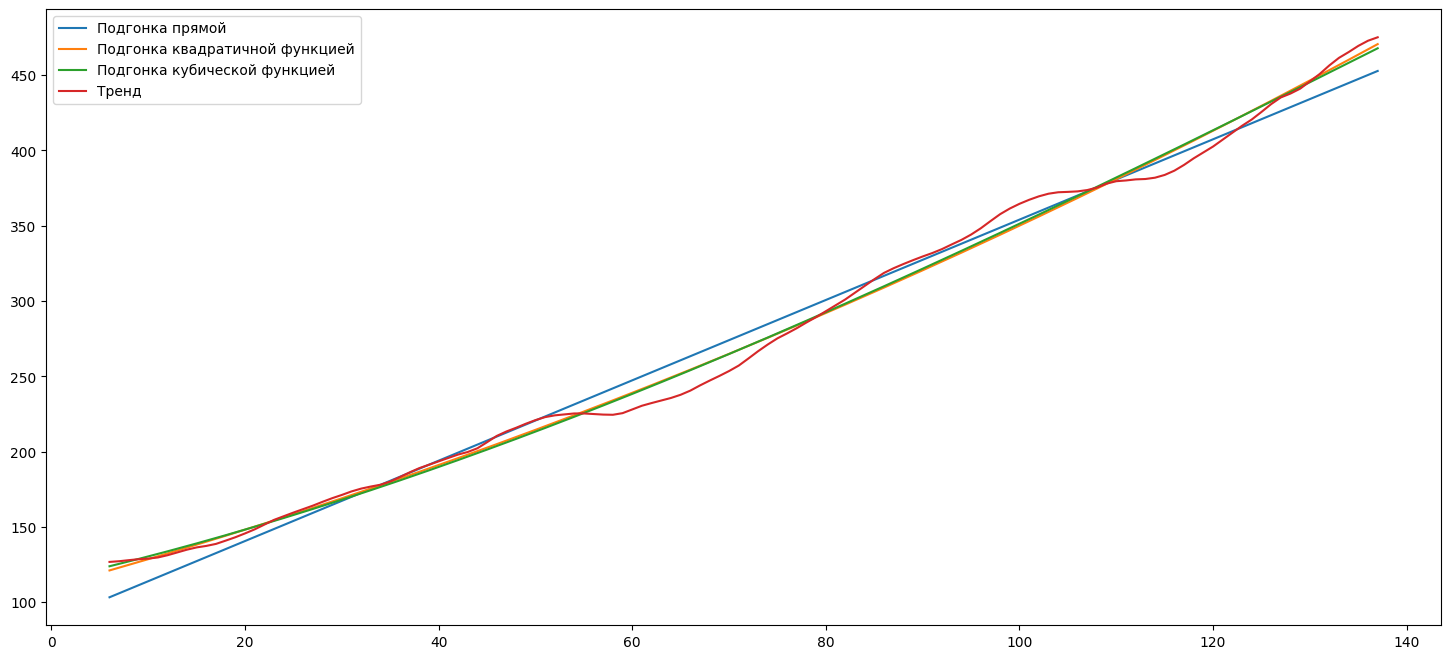

In [78]:
pred_trend = pd.DataFrame({
    'Подгонка прямой': y1,
    'Подгонка квадратичной функцией': y2,
    'Подгонка кубической функцией': y3,
    'Тренд': y})
pred_trend.plot(figsize=(18,8))

Какой функцией лучше аппроксимировать тренд?

Линейная модель для тренда занижает прогноз 

Квадратичная и кубическая функции почти не отличаются в прогнозе. А если разницы почти нет, то лучше выбрать ту которая проще. Поэтому выбираем квадратичную.

## Готовим данные для вычисления прогнозов

Модель уже отобрана и готова, а вот данные для прогноза еще нужно сформировать.

In [79]:
X_forecast = pd.DataFrame({'month_num':range(145, 157)})
X_forecast['num^2'] = X_forecast['month_num']**2
X_forecast

,month_num,num^2
0,145,21025
1,146,21316
2,147,21609
3,148,21904
4,149,22201
5,150,22500
6,151,22801
7,152,23104
8,153,23409
9,154,23716


### Сам прогноз для тренда

In [81]:
forecast_ = model2.predict(X_forecast)
forecast_

array([474.00211191, 477.51037995, 481.03120514, 484.56458751,
       488.11052705, 491.66902375, 495.24007762, 498.82368866,
       502.41985687, 506.02858224, 509.64986479, 513.2837045 ])

### Добавляем к тренду сезонные поправки

In [84]:
result.seasonal.head(14)

0     0.910230
1     0.883625
2     1.007366
3     0.975906
4     0.981378
5     1.112776
6     1.226556
7     1.219911
8     1.060492
9     0.921757
10    0.801178
11    0.898824
12    0.910230
13    0.883625
Name: seasonal, dtype: float64

Поскольку сезонные поправки мультипликативные, перемножаем сезонность и тренд

Получаем прогноз на 12 наблюдений, то есть на 12 месяцев, на год 

In [85]:
forecast_2 = forecast_ * result.seasonal.iloc[0:12]
forecast_2

0     431.451116
1     421.940263
2     484.574619
3     472.889494
4     479.020946
5     547.117404
6     607.439462
7     608.520490
8     532.812205
9     466.435510
10    408.320301
11    461.351913
Name: seasonal, dtype: float64

In [86]:
horizon_ = 12
# Номера месяцев, для которых делается прогноз

valid = range(len(gseries)+1, len(gseries)+horizon_ + 1, 1)

In [87]:
list(valid)

[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]

In [88]:
forecast_2.index = list(valid)

In [89]:
forecast_2

145    431.451116
146    421.940263
147    484.574619
148    472.889494
149    479.020946
150    547.117404
151    607.439462
152    608.520490
153    532.812205
154    466.435510
155    408.320301
156    461.351913
Name: seasonal, dtype: float64

## Ряд и прогноз

Text(0.5, 1.0, 'Прогноз авиаперевозок методом Сезонная декомпозиция')

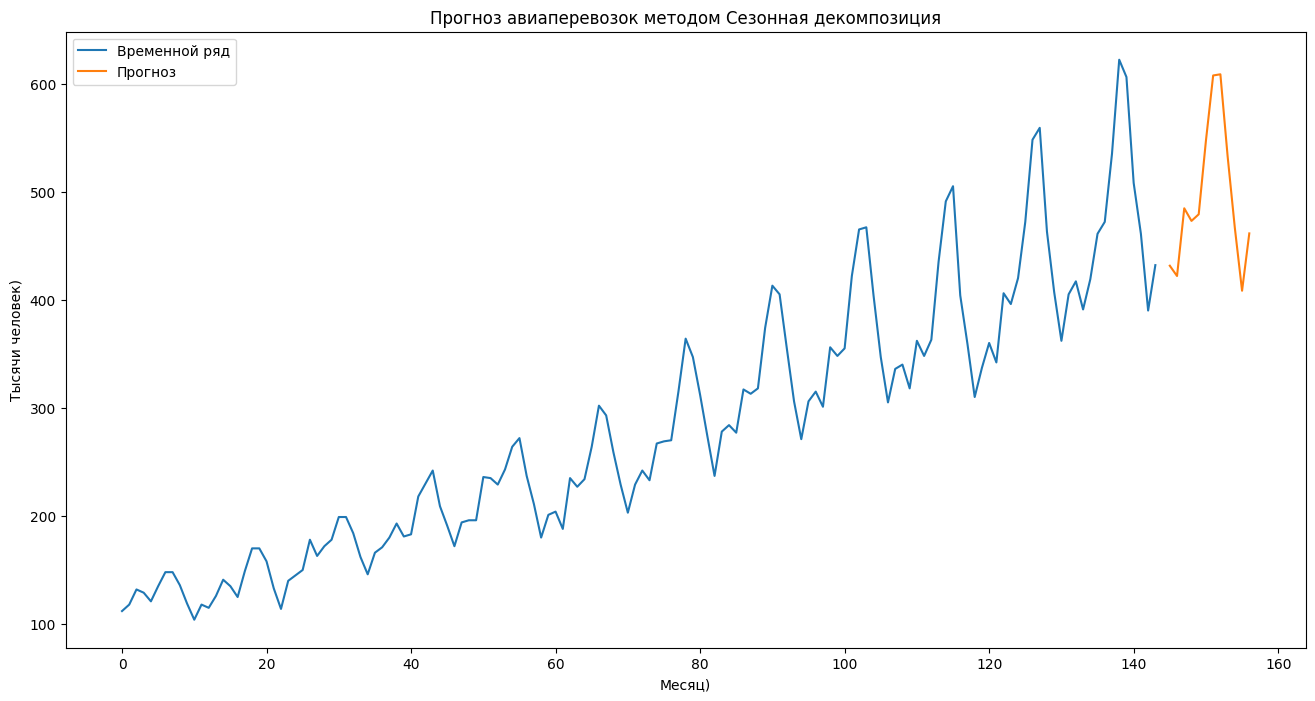

In [90]:
plt.figure(figsize=(16,8))
plt.plot(gseries, label='Временной ряд')
plt.plot(forecast_2, label='Прогноз')
plt.legend(loc='best')

plt.xlabel(u'Месяц)')
plt.ylabel(u'Тысячи человек)')
plt.title(u'Прогноз авиаперевозок методом Сезонная декомпозиция')

Вывод:
- получили тренд, сезонность, ошибки,
- построили без сезонности,
- а для прогноза, сделали предсказание для тренда и наложили на него сезонность. 